In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("bike.csv")
df.head(2)

In [13]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour

In [10]:
df["casual"].plot.box()

In [15]:
df[["casual", "registered"]].plot.box()

<AxesSubplot:xlabel='hour'>

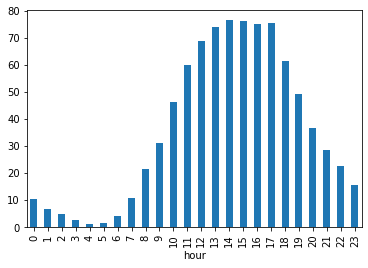

In [14]:
df_hour = df.groupby("hour")["casual"].mean()
df_hour.plot.bar()

In [41]:
df = pd.read_csv("stock_kr_daily_m_211005_211008/stock_m_20211005.csv",
                 low_memory=False)
df.head(2)

stock_cd  cont_time  price  p_start  p_max  p_min  cum_cnt  cont_cnt
0   155660     153000   8320     8320   8320   8320   832514     10738
1   155660     152900   8390     8390   8390   8390   821776         0

In [19]:
len(df)

911030

In [24]:
df_stat = df.groupby("stock_cd")["price"].agg(["std", "mean"]).reset_index()
# df_stat.head(2)

In [30]:
df_stat["CV"] = df_stat["std"] / df_stat["mean"]
df_stat.head(2)

In [29]:
df_stat["CV"].describe()

In [27]:
df_list = pd.read_csv("stock_kr_daily_m_211005_211008/stock_list_kr_20211005.csv")
df_list.head(2)

stock_cd  state_cd stock_nm  price  vs_y  vs_y_sign  vs_y_rate  cum_cnt  \
0   155660         0      DSR   8400   900          2      12.00  1533447   
1   096640        57      멜파스   1760   185          2      11.75  7443625   

     cum_price  sel_q  ...  con_ll_days  con_up_days  con_dn_days  \
0  12520686510   3172  ...            0            1            3   
1  13136275225  23687  ...            0            1            4   

   con_st_days  biz_kr  theme_kr_1  theme_kr_2  theme_cd_1 theme_cd_2 call_cnt  
0            0   철강.금속       섬유/의류         NaN       931.0        NaN     2147  
1            0    IT부품         LCD       터치스크린         3.0      375.0     2147  

[2 rows x 24 columns]

### Q. 10월 5일자 주식 분봉데이터를 기반으로 각 종목별 변동계수를 계산하고 변동계수가 제 3사분위수 보다 큰 종목을 선별하여 해당 종목코드와 종목명을 매칭하고 각 종목의 종목명을 확인해보시오.
※ 데이터: stock_m_20211005.csv  
※ 종목명: stock_list_kr_20211005.csv  

In [31]:
df = pd.read_csv("stock_kr_daily_m_211005_211008/stock_m_20211005.csv",
                 low_memory=False)
df_stat = df.groupby("stock_cd")["price"].agg(["std", "mean"]).reset_index()
df_stat["CV"] = df_stat["std"] / df_stat["mean"]
df_stat.head(2)

stock_cd        std          mean        CV
0   000040   7.790655    952.332481  0.008181
1   000050  66.145084  13420.460358  0.004929

In [32]:
df_list = pd.read_csv("stock_kr_daily_m_211005_211008/stock_list_kr_20211005.csv")
df_list.head(2)

stock_cd  state_cd stock_nm  price  vs_y  vs_y_sign  vs_y_rate  cum_cnt  \
0   155660         0      DSR   8400   900          2      12.00  1533447   
1   096640        57      멜파스   1760   185          2      11.75  7443625   

     cum_price  sel_q  ...  con_ll_days  con_up_days  con_dn_days  \
0  12520686510   3172  ...            0            1            3   
1  13136275225  23687  ...            0            1            4   

   con_st_days  biz_kr  theme_kr_1  theme_kr_2  theme_cd_1 theme_cd_2 call_cnt  
0            0   철강.금속       섬유/의류         NaN       931.0        NaN     2147  
1            0    IT부품         LCD       터치스크린         3.0      375.0     2147  

[2 rows x 24 columns]

In [37]:
df_join = pd.merge(df_stat.loc[df_stat["CV"] >= df_stat["CV"].quantile(0.75), ],
                   df_list[["stock_cd", "stock_nm"]], 
                   left_on = "stock_cd", right_on = "stock_cd",
                   how = "inner")
df_join.head(2)

stock_cd         std          mean        CV stock_nm
0   000080  504.221799  33389.386189  0.015101    하이트진로
1   000227  367.148944  21793.094629  0.016847  유유제약2우B

In [38]:
len(df_join)

583

In [48]:
stock_list = ["KB금융", "DB금융투자", "BNK금융지주"]

In [49]:
df_list_sub = df_list.loc[df_list["stock_nm"].isin(stock_list), ]
df_list_sub

stock_cd  state_cd stock_nm  price  vs_y  vs_y_sign  vs_y_rate  cum_cnt  \
1137   105560        55     KB금융  55800  1600          2       2.95  1350703   
1572   016610        55   DB금융투자   6430   120          2       1.90    79662   
1791   138930        55  BNK금융지주   8720   110          2       1.28  1166286   

        cum_price  sel_q  ...  con_ll_days  con_up_days  con_dn_days  \
1137  74982392200   4020  ...            0            1            3   
1572    510310380   5724  ...            0            1            3   
1791  10126584060   9462  ...            0            1            1   

      con_st_days  biz_kr  theme_kr_1  theme_kr_2  theme_cd_1 theme_cd_2  \
1137            0     금융업          은행         NaN       324.0        NaN   
1572            0      증권          증권         NaN       285.0        NaN   
1791            0     금융업          은행         NaN       324.0        NaN   

     call_cnt  
1137     2147  
1572     2147  
1791     2147  

[3 rows x 24 columns]

In [51]:
df_sub = df.loc[df["stock_cd"].isin(df_list_sub["stock_cd"]), ]
df_sub.head(2)

In [54]:
cd_test = df_sub["stock_cd"].unique()
cd_test

array(['105560', '016610', '138930'], dtype=object)

In [53]:
from scipy.stats import bartlett

In [56]:
stat, p = bartlett(df_sub.loc[df_sub["stock_cd"] == cd_test[0], "price"],
                   df_sub.loc[df_sub["stock_cd"] == cd_test[1], "price"],
                   df_sub.loc[df_sub["stock_cd"] == cd_test[2], "price"])
print(stat)
print(p)

1412.3721510803605
2.029010039817425e-307


세 집단의 등분산 검정 결과 p-value가 0($2.029 \times 10^{-307}$)으로 유의수준 5%(0.05) 보다 작음으로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 적어도 한 쌍의 집단간 분산이 다르다는 대립가설을 채택한다.

In [ ]:
values = df_sub.loc[df_sub["stock_cd"] == cd_test[0], "price"]
stat, p = bartlett(values,
                   values * 1.1)
print(stat)
print(p)

두 집단의 등분산 검정 결과 p-value가 0.06으로 유의수준 5%(0.05) 보다 큼으로 귀무가설을 기각하지 못한다. 즉, "집단간 분산이 같다"는 귀무가설을 기각하지 못한다.

### Q. values 객체의 값을 대상으로 정규성 검정(Shapiro-Wilk)을 실시하고 그 결과를 해석하시오.

In [59]:
from scipy.stats import shapiro

In [61]:
stat, p = shapiro(values)
print(p)

2.5064011310860224e-08


p-value < 유의수준($\alpha$) : 귀무가설을 기각하고 대립가설 채택  
정규분포를 따르지 않음.

In [62]:
from scipy.stats import levene

In [63]:
stat, p = levene(values,
                 values * 1.1)
print(stat)
print(p)

2.177862909817437
0.14041231074334387


두 집단의 등분산 검정(levene) 결과 p-value가 0.14으로 유의수준 5%(0.05) 보다 큼으로 귀무가설을 기각하지 못한다. 즉, "집단간 분산이 같다"는 귀무가설을 기각하지 못한다

In [64]:
from scipy.stats import chi2_contingency

In [69]:
df = pd.read_csv("traffic_accident.txt", sep = "\t")
df.head(2)

In [70]:
df_tab = pd.crosstab(df["sex"], df["serious_yn"])
df_tab

In [71]:
stat, p, dof, v_exp = chi2_contingency(df_tab)
print(stat)
print(p)
print(dof)
print(v_exp)

3.7895026717172966
0.051574970410524265
1
[[286.99343955  30.00656045]
 [679.00656045  70.99343955]]


두 집단(성별, 교통사고 심각여부)의 독립성 검정 결과 p-value가 0.052로 유의수준 5%(0.05) 보다 큼으로 귀무가설을 기각하지 못함.

In [76]:
df_tab = pd.crosstab(df["age"], df["serious_yn"])
stat, p, dof, v_exp = chi2_contingency(df_tab)
print(p)

0.051619825959927854


두 집단(나이, 교통사고 심각여부)의 독립성 검정 결과 p-value가 0.052로 유의수준 5%(0.05) 보다 큼으로 귀무가설을 기각하지 못함.

In [2]:
from scipy.stats import pearsonr
df = pd.read_excel("iris_xlsx.xlsx")
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [3]:
stat, p = pearsonr(df["Petal.Length"], df["Petal.Width"])
print(stat)
print(p)

0.962865431402796
4.6750039073285846e-86


In [5]:
df.plot.scatter(x = "Petal.Length", y = "Petal.Width")

In [7]:
df.corr()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000

In [8]:
pearsonr(df["Sepal.Length"], df["Petal.Length"])

(0.8717537758865832, 1.0386674194497525e-47)

<AxesSubplot:xlabel='Sepal.Length', ylabel='Petal.Length'>

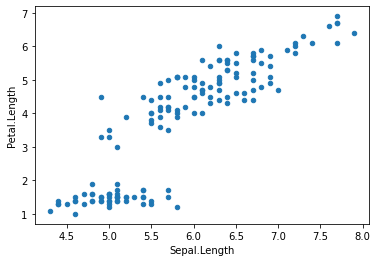

In [9]:
df.plot.scatter(x = "Sepal.Length", y = "Petal.Length")

In [6]:
df.corr(method = "spearman")

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.166778      0.881898     0.834289
Sepal.Width      -0.166778     1.000000     -0.309635    -0.289032
Petal.Length      0.881898    -0.309635      1.000000     0.937667
Petal.Width       0.834289    -0.289032      0.937667     1.000000

In [10]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [11]:
from scipy.stats import ttest_1samp # 단일표본 t-검정
from scipy.stats import ttest_rel # 대응표본
from scipy.stats import ttest_ind # 독립표본

In [12]:
stat, p = ttest_1samp(df["Sepal.Length"], popmean = 4)
print(stat)
print(p)

27.263680640799215
8.764592435410748e-60


수집된 붓꽃의 꽃받침 길이 데이터의 평균과 모평균(4)를 단일표본 t-검정을 사용하여 검정한 결과 p-value가 $8.76 \times 10^{-60}$으로 유의수준 5% 보다 작기 때문에 집단간(모집단과 표본집단) 평균이 같다는 귀무가설을 기각하고 집단간 평균이 다르다는 대립가설을 채택한다.

In [13]:
df["Sepal.Length"].mean()

5.843333333333335

In [39]:
stat, p = ttest_1samp(df["Sepal.Length"], popmean = 5.843333)
print(stat)
print(p)

4.93014116539061e-06
0.9999960729110383


In [44]:
df_bike = pd.read_csv("bike.csv")
df_bike_sub = df_bike[["datetime", "casual", "registered"]]
df_bike_sub.head()

In [45]:
stat, p = ttest_rel(df_bike_sub["casual"],
                    df_bike_sub["registered"])
print(p)

0.0


### Q. 시간대별로 casual 변수와 registered 변수의 평균을 계산하고 시간대별 각 변수의 평균값을 활용하여 대응표본 t-검정을 실시하시오.
※df_bike_sub 객체를 사용하여 분석하시오.

In [47]:
df_bike = pd.read_csv("bike.csv")
df_bike_sub = df_bike[["datetime", "casual", "registered"]]
df_bike_sub.head()

datetime  casual  registered
0  2011-01-01 00:00:00       3          13
1  2011-01-01 01:00:00       8          32
2  2011-01-01 02:00:00       5          27
3  2011-01-01 03:00:00       3          10
4  2011-01-01 04:00:00       0           1

In [50]:
df_bike_sub = df_bike_sub.reset_index(drop = True)
df_bike_sub["datetime"] = pd.to_datetime(df_bike_sub["datetime"])
df_bike_sub["hour"] = df_bike_sub["datetime"].dt.hour
df_stat = df_bike_sub.groupby("hour")[["casual", "registered"]].mean()
df_stat.head(2)

casual  registered
hour                       
0     10.312088   44.826374
1      6.513216   27.345815

In [49]:
stat, p = ttest_rel(df_stat["casual"],
                    df_stat["registered"])
print(p)

3.2283850707620033e-06


### Q. 3\~5월의 temp 데이터와 9\~11월의 temp데이터의 평균이 통계적으로 유의미하게 차이나는지 적절한 검정방법을 사용하여 그 결과를 알아보시오.
※ bartlett test 의 결과를 기반으로 equal_var 인자에 들어갈 값을 결정지으시오.  

In [53]:
df_bike = pd.read_csv("bike.csv")
df_bike["datetime"] = pd.to_datetime(df_bike["datetime"])
df_bike["month"] = df_bike["datetime"].dt.month
# df_bike.head(2)

temp_1 = df_bike.loc[df_bike["month"].isin([3, 4, 5]), "temp"]
temp_2 = df_bike.loc[df_bike["month"].isin([9, 10, 11]), "temp"]

In [54]:
from scipy.stats import bartlett

In [55]:
bartlett(temp_1, temp_2) # 집단간 분산이 통계적으로 유의미하게 다름(이분산)

BartlettResult(statistic=20.014243654446197, pvalue=7.686745411871885e-06)

In [56]:
ttest_ind(temp_1, temp_2, equal_var = False)

Ttest_indResult(statistic=-10.384033998707384, pvalue=5.028220106451432e-25)

In [61]:
print(temp_1.mean())
print(temp_2.mean())

19.111542983100463
20.62911021603818


In [59]:
from scipy.stats import f_oneway
df = pd.read_excel("iris_xlsx.xlsx")

In [60]:
stat, p = f_oneway(df["Sepal.Length"],
                   df["Sepal.Width"],
                   df["Petal.Length"])
print(stat)
print(p)

236.75163298404746
7.657188374182084e-71


In [63]:
df.mean(numeric_only=True)

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [93]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [68]:
df = df.rename(columns = {"Sepal.Length": "SL"})

In [69]:
model = ols(formula = "SL ~ Species", data = df).fit()
anova_lm(model)

df     sum_sq    mean_sq           F        PR(>F)
Species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN

In [88]:
df.groupby("Species")["SL"].mean()

Species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: SL, dtype: float64

In [89]:
df = pd.read_csv("diamonds.csv")
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [90]:
formula = "price ~ C(cut)"
lm = ols(formula, df).fit()
anova_lm(lm)

df        sum_sq       mean_sq           F         PR(>F)
C(cut)        4.0  1.104175e+10  2.760436e+09  175.688717  8.428307e-150
Residual  53935.0  8.474314e+11  1.571209e+07         NaN            NaN

In [91]:
df.groupby("cut")["price"].mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [96]:
df_bike = pd.read_csv("bike.csv")
model = ols(formula = "casual ~ season", data = df_bike).fit()
anova_lm(model)

df        sum_sq        mean_sq           F        PR(>F)
season        1.0  2.543642e+05  254364.153634  102.860335  4.600135e-24
Residual  10884.0  2.691513e+07    2472.908085         NaN           NaN

In [95]:
model2 = ols(formula = "casual ~ C(season)", data = df_bike).fit()
anova_lm(model2)

df        sum_sq        mean_sq           F         PR(>F)
C(season)      3.0  2.357570e+06  785856.669382  344.660562  7.937799e-214
Residual   10882.0  2.481193e+07    2280.088747         NaN            NaN

In [97]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [103]:
result = pairwise_tukeyhsd(df["price"], df["cut"])
print(result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
   Fair      Good -429.8933 0.0015  -740.4567 -119.3299   True
   Fair     Ideal -901.2158  0.001 -1180.5785 -621.8531   True
   Fair   Premium  225.4999  0.195   -59.2739  510.2738  False
   Fair Very Good -376.9979 0.0031  -663.8694  -90.1263   True
   Good     Ideal -471.3225  0.001   -642.367 -300.2779   True
   Good   Premium  655.3933  0.001   475.6466  835.1399   True
   Good Very Good   52.8954    0.9  -130.1565  235.9474  False
  Ideal   Premium 1126.7157  0.001  1008.8058 1244.6257   True
  Ideal Very Good  524.2179  0.001   401.3281  647.1078   True
Premium Very Good -602.4978  0.001  -737.2366 -467.7591   True
--------------------------------------------------------------


In [108]:
bartlett(df.loc[df["cut"] == df["cut"].unique()[0], "price"],
         df.loc[df["cut"] == df["cut"].unique()[1], "price"],
         df.loc[df["cut"] == df["cut"].unique()[2], "price"],
         df.loc[df["cut"] == df["cut"].unique()[3], "price"],
         df.loc[df["cut"] == df["cut"].unique()[4], "price"])

BartlettResult(statistic=406.6960562289963, pvalue=9.94131729362807e-87)

In [104]:
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [109]:
formula = "price ~ C(cut) * C(clarity)"
model2  = ols(formula, data = df).fit()
anova_lm(model2)

df        sum_sq       mean_sq           F  \
C(cut)                 4.0  1.104175e+10  2.760436e+09  180.157428   
C(clarity)             7.0  1.890981e+10  2.701402e+09  176.304579   
C(cut):C(clarity)     28.0  2.646561e+09  9.452003e+07    6.168766   
Residual           53900.0  8.258750e+11  1.532236e+07         NaN   

                          PR(>F)  
C(cut)             1.277078e-153  
C(clarity)         2.918210e-259  
C(cut):C(clarity)   9.645200e-23  
Residual                     NaN